In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors

# KNN 실습

In [3]:
iris = sns.load_dataset('iris')

In [4]:
# MinMaxScaler로 정규화하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [7]:
iris[features] = scaler.fit_transform(iris[features])

In [8]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


In [9]:
# 데이터를 훈련데이터와 테스트데이터로 나누기
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(iris, test_size = 0.3, random_state = 1)

In [10]:
df_train

,sepal_length,sepal_width,petal_length,petal_width,species
118,0.944444,0.250000,1.000000,0.916667,virginica
18,0.388889,0.750000,0.118644,0.083333,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
45,0.138889,0.416667,0.067797,0.083333,setosa
59,0.250000,0.291667,0.491525,0.541667,versicolor
...,...,...,...,...,...
133,0.555556,0.333333,0.694915,0.583333,virginica
137,0.583333,0.458333,0.762712,0.708333,virginica
72,0.555556,0.208333,0.661017,0.583333,versicolor
140,0.666667,0.458333,0.779661,0.958333,virginica


In [12]:
df_test.shape

(45, 5)

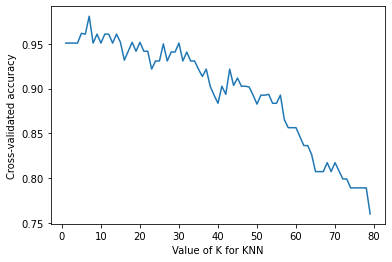

In [17]:
#최적 k 찾기
from sklearn.model_selection import cross_val_score

k_range = np.arange(1, 80)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, df_train[features], df_train['species'], cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()


In [20]:
result = pd.DataFrame()
result['k'] = k_range
result['accuracy'] = k_scores
result = result.sort_values(by = 'accuracy', ascending = False).reset_index(drop = True)
result

,k,accuracy
0,7,0.980909
1,5,0.961818
2,14,0.960909
3,6,0.960909
4,9,0.960909
...,...,...
74,75,0.789091
75,76,0.789091
76,77,0.789091
77,78,0.789091


In [22]:
# 위 과정에서 얻은 최적 k로 테스트 데이터의 label 예측하기
classifier = neighbors.KNeighborsClassifier(result['k'][0])
classifier.fit(df_train[features], df_train['species'])
pred = classifier.predict(df_test[features])

In [23]:
# 분류결과 및 accuracy 확인하기
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(df_test['species'], pred))
print(accuracy_score(df_test['species'], pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
0.9555555555555556
